# Practical Work 4

- For this practical work, the trainees will develop a Python program that is able to implement the <b>Mini-Batch gradient descent</b> in order to achieve the linear regression (Single and Multivariables) of a set of datapoints.

##### Very Important notes:
- <font color='red'><b>Data should be shuffled for Mini-Batch GD to work fine.</b></font>
- <font color='red'><b>When you shuffle the data, input varibles and equivelant target label should be together. i.e. do not shuffle X and y separately or your data will be missed up.</b></font>
- <font color='red'><b>Save your losses and thetas for each iterations i.e. each mini-batch (not each epoch).</b></font>
- <font color='red'><b>Plot loss vs. iterations (not epochs). This will allow you to see the difference between mini-batch, SGD, and batch GD.</font>
- <font color='red'><b>Convergence check should be performed each epoch not each iterations. This allows you to perform more accurate decision. This is because the noisy process could lead to a deciving decision.</b></font>

### Prerequisites:
- You should have seen <b>Day 1 and Day 2 as will as Day 3 Part 1 and Part 2</b> from our course <b><i>Master Numerical Optimization for Machine Learning and Deep Learning in 5 Days</b></i>.
- The course is available for free on our channel <b><i>Artificial Intelligence & Data Science شرح بالعربي</i></b>.
- Course link https://youtube.com/playlist?list=PLJM7jJIw2GC15hvIwN8sBXok__yLMcMxN&feature=shared

### Import numpy, matplotlib.pyplot

In [9]:
def plot_loss(Losses,Title):
    plt.figure(figsize=(10,7))
    plt.grid()
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.plot(Losses,'-*',markersize=8)
    plt.title(Title,fontsize=16,fontweight='bold')
    plt.show()
    
def plot_loss_iter(Losses,Title):
    plt.figure(figsize=(10,7))
    plt.grid()
    plt.xlabel('Iterations')
    plt.ylabel('Loss')
    plt.plot(Losses,'-*',markersize=8)
    plt.title(Title,fontsize=16,fontweight='bold')
    plt.show()
    
def plot_theta_loss(Th,Th_0_1,Losses,Title):
    plt.figure(figsize=(10,7))
    plt.grid()
    plt.xlabel(Th_0_1,fontsize=14,fontweight='bold')
    plt.ylabel('Loss',fontsize=14,fontweight='bold')
    plt.plot(Th,Losses,'-mo',markersize=8)
    plt.title(Title,fontsize=16,fontweight='bold')
    plt.show()

def calc_best_fit(Ths,Xin):
    y_best_fit= Xin @ Ths
    return y_best_fit

def plotReg(X,y,y_pred,Title):
    plt.figure(figsize =(10,8))
    plt.scatter(X,y)
    plt.xlabel('X')
    plt.ylabel('y')
    plt.plot(X,y_pred,'r*-')
    plt.title(Title,fontsize=16,fontweight='bold')
    plt.show()

In [10]:
import numpy as np , matplotlib.pyplot as plt 

In [11]:
data=np.genfromtxt("MultiVarLR.csv",delimiter=',')
data

array([[ 73.,  80.,  75., 152.],
       [ 93.,  88.,  93., 185.],
       [ 89.,  91.,  90., 180.],
       [ 96.,  98., 100., 196.],
       [ 73.,  66.,  70., 142.],
       [ 53.,  46.,  55., 101.],
       [ 69.,  74.,  77., 149.],
       [ 47.,  56.,  60., 115.],
       [ 87.,  79.,  90., 175.],
       [ 79.,  70.,  88., 164.],
       [ 69.,  70.,  73., 141.],
       [ 70.,  65.,  74., 141.],
       [ 93.,  95.,  91., 184.],
       [ 79.,  80.,  73., 152.],
       [ 70.,  73.,  78., 148.],
       [ 93.,  89.,  96., 192.],
       [ 78.,  75.,  68., 147.],
       [ 81.,  90.,  93., 183.],
       [ 88.,  92.,  86., 177.],
       [ 78.,  83.,  77., 159.],
       [ 82.,  86.,  90., 177.],
       [ 86.,  82.,  89., 175.],
       [ 78.,  83.,  85., 175.],
       [ 76.,  83.,  71., 149.],
       [ 96.,  93.,  95., 192.]])

### Read your multivariable LR data into X, y variables and make shure of dimensions.

In [13]:
x=data[:,:3]
y=data[:,3].reshape((-1,1))
print(f"x:{x}")
print(f"y :{y}")

x:[[ 73.  80.  75.]
 [ 93.  88.  93.]
 [ 89.  91.  90.]
 [ 96.  98. 100.]
 [ 73.  66.  70.]
 [ 53.  46.  55.]
 [ 69.  74.  77.]
 [ 47.  56.  60.]
 [ 87.  79.  90.]
 [ 79.  70.  88.]
 [ 69.  70.  73.]
 [ 70.  65.  74.]
 [ 93.  95.  91.]
 [ 79.  80.  73.]
 [ 70.  73.  78.]
 [ 93.  89.  96.]
 [ 78.  75.  68.]
 [ 81.  90.  93.]
 [ 88.  92.  86.]
 [ 78.  83.  77.]
 [ 82.  86.  90.]
 [ 86.  82.  89.]
 [ 78.  83.  85.]
 [ 76.  83.  71.]
 [ 96.  93.  95.]]
y :[[152.]
 [185.]
 [180.]
 [196.]
 [142.]
 [101.]
 [149.]
 [115.]
 [175.]
 [164.]
 [141.]
 [141.]
 [184.]
 [152.]
 [148.]
 [192.]
 [147.]
 [183.]
 [177.]
 [159.]
 [177.]
 [175.]
 [175.]
 [149.]
 [192.]]


### Step 1: Shuffle your data
- In this step we will also get the number of data points <b>(m)</b> and dimensions <b>n+1</b> .
- We will also add the column of ones <b>x0</b>
- Set random seed to 101.
- <b>Make sure the shuffled target label is a column vector</b>.

In [15]:
m=x.shape[0]
ones=np.ones((m,1))
x_new=np.concatenate( (ones,x),axis=1)
n_1=x_new.shape[1]
data_new=np.concatenate( (x_new,y),axis=1)
np.random.seed(101)
np.random.shuffle(data_new)
x_sh=data_new[:,:n_1]
y_sh=data_new[:,n_1].reshape((-1,1))
y_sh

array([[147.],
       [141.],
       [175.],
       [159.],
       [115.],
       [175.],
       [180.],
       [196.],
       [185.],
       [148.],
       [177.],
       [152.],
       [184.],
       [101.],
       [149.],
       [177.],
       [142.],
       [175.],
       [152.],
       [164.],
       [192.],
       [192.],
       [149.],
       [183.],
       [141.]])

### Step 2: Parameters initialization (thetas = column vector of zeros, alpha = 0.00001)
- We will also define empty lists to save losses, thetas in all iterations.
- We will define the <b>mini-batch size</b> here we will use <b>mini-batch size = 4</b> .

In [17]:
loss=[]
mini_batch=4
ths=np.zeros((n_1,1))
ths

array([[0.],
       [0.],
       [0.],
       [0.]])

### Step 3: Claculate the prediction for the first mini-batch
#### You will need to slize the data and take the first (b = 4) points only according to the mini-batch size.

In [19]:
x_min=x_sh[:mini_batch,:]
y_min=y_sh[:mini_batch,:]
print(x_min,y_min)

[[ 1. 78. 75. 68.]
 [ 1. 69. 70. 73.]
 [ 1. 78. 83. 85.]
 [ 1. 78. 83. 77.]] [[147.]
 [141.]
 [175.]
 [159.]]


In [20]:
h=x_min@ths
h

array([[0.],
       [0.],
       [0.],
       [0.]])

### Step 4: Clculate the error vector, cost, gradient as in Multivariable Bacth GD. However, here you will use the mini-batch data only.
#### Make sure in cost and gradient calculation you divide by batch size not the data size.

In [22]:
e=h-y_min
e

array([[-147.],
       [-141.],
       [-175.],
       [-159.]])

In [23]:
j= (np.linalg.norm(e)**2)/(2*mini_batch)
j

12174.5

In [24]:
grad=x_min.T@e/mini_batch
grad

array([[  -155.5 ],
       [-11811.75],
       [-12154.25],
       [-11851.75]])

### Step 5: Update theta values

In [26]:
ths=np.zeros((n_1,1))
alpha= .00001
ths=ths-alpha*grad
ths

array([[0.001555 ],
       [0.1181175],
       [0.1215425],
       [0.1185175]])

### Step 6: Iterate through all mini-batches to finish the first epoch
#### Save thetas and loss each iteration  (minibatch) i.e. with each update.
#### Reinitialize parameters in the begining.
#### Plot the learning curves to explore parameters update in single epoch.
##### Note: According to the batch size, the last mini-batch should contain either the same data points as the previous mini-batches or more:
- Ex. if m = 25 and mini-batch size = 5 then we will have 5 mini-batches each contains 5 data points.
- Ex. if m = 25 and mini-batch size = 4 then we will have round(25/4) = 6 mini-batches each contains 4 data points except the last one will contain 5 data points.

In [28]:
alpha=.00001
batch_size=4
m=x_sh.shape[0]
n_1=x_sh.shape[1]
ths=np.zeros((n_1,1))
loss=[]
ths_arr=[]
num_batch=m//batch_size
for i in range(num_batch):
    print(f"******************************mimi batch {i+1}******************************************\n")
    st=i* batch_size
    ed=(i+1)*(batch_size)
    if(i+1!=num_batch):
        x_b=x_sh[st:ed]
        y_b=y_sh[st:ed]
    else : 
        x_b=x_sh[st:]
        y_b=y_sh[st:]

    print(f"x batch \n{x_b} \n")
    print(f"y batch \n{y_b}\n")
    print(f"ths=\n{ths}\n")
    ths_arr.append(ths)
    h=x_b@ths    #  (4,4)* (4,1)=4*1
    print(f"h=\n{h}\n")
    e=h-y_b
    print(f"e=\n{e}\n")
    j=np.linalg.norm(e)**2/(2*len(h))    #  do not devide on batch_size  but on len(h)  as batch size  size change
    print(f"j={j}\n")
    loss.append(j)
    grad=x_b.T@e/len(h)    #(4,4) @ (4,1)
    print(f"grad =\n{grad}\n")
    ths=ths-alpha*grad




    


    
    

******************************mimi batch 1******************************************

x batch 
[[ 1. 78. 75. 68.]
 [ 1. 69. 70. 73.]
 [ 1. 78. 83. 85.]
 [ 1. 78. 83. 77.]] 

y batch 
[[147.]
 [141.]
 [175.]
 [159.]]

ths=
[[0.]
 [0.]
 [0.]
 [0.]]

h=
[[0.]
 [0.]
 [0.]
 [0.]]

e=
[[-147.]
 [-141.]
 [-175.]
 [-159.]]

j=12174.5

grad =
[[  -155.5 ]
 [-11811.75]
 [-12154.25]
 [-11851.75]]

******************************mimi batch 2******************************************

x batch 
[[  1.  47.  56.  60.]
 [  1.  86.  82.  89.]
 [  1.  89.  91.  90.]
 [  1.  96.  98. 100.]] 

y batch 
[[115.]
 [175.]
 [180.]
 [196.]]

ths=
[[0.001555 ]
 [0.1181175]
 [0.1215425]
 [0.1185175]]

h=
[[19.4705075]
 [30.6742025]
 [32.240955 ]
 [35.10375  ]]

e=
[[ -95.5294925]
 [-144.3257975]
 [-147.759045 ]
 [-160.89625  ]]

j=9709.519800586633

grad =
[[  -137.12764625]
 [-11374.62493437]
 [-11599.5681425 ]
 [-11991.17614438]]

******************************mimi batch 3****************************************

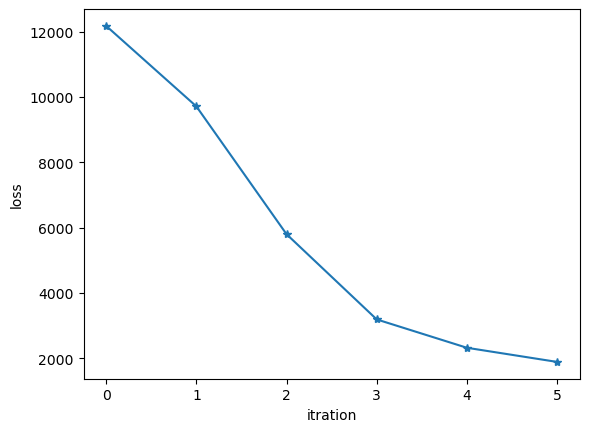

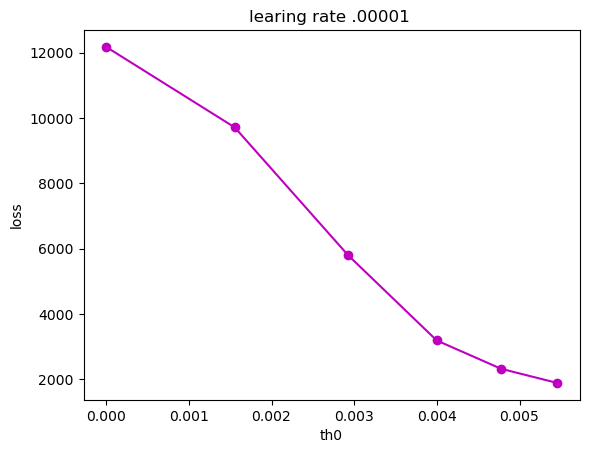

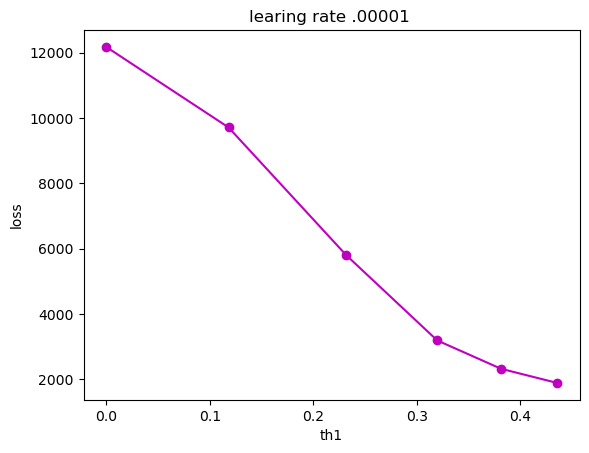

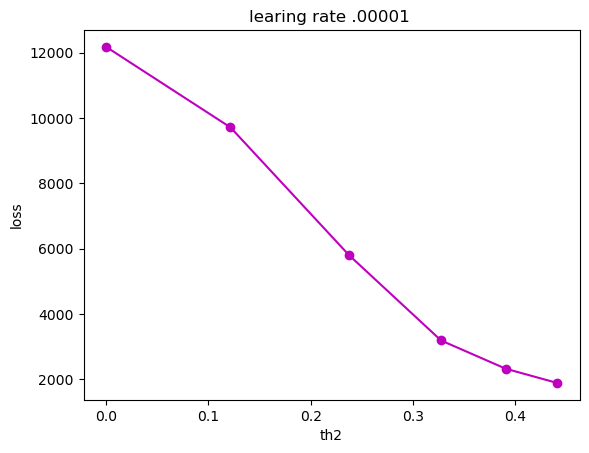

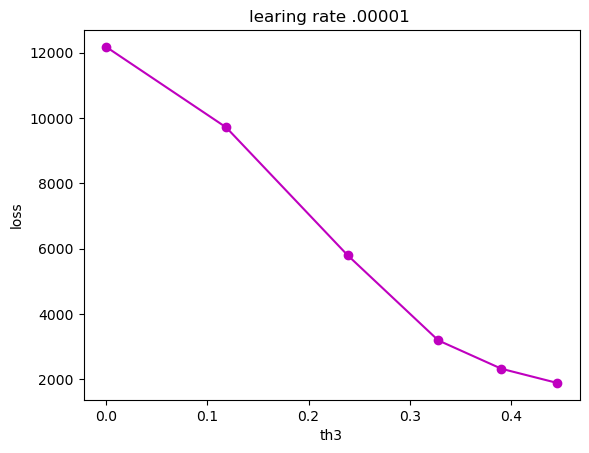

In [29]:
arr=np.array(ths_arr)
arr=arr.reshape((6,4))
plt.figure()

plt.plot(loss,'*-')
plt.ylabel("loss")
plt.xlabel("itration")

plt.show()

plt.figure()
plt.plot(arr[:,0],loss,'mo-')
plt.title("learing rate .00001 ")
plt.ylabel("loss")
plt.xlabel("th0")
plt.show()

plt.figure()
plt.plot(arr[:,1],loss,'mo-')
plt.title("learing rate .00001 ")
plt.ylabel("loss")
plt.xlabel("th1")
plt.show()

plt.figure()
plt.plot(arr[:,2],loss,'mo-')
plt.title("learing rate .00001 ")
plt.ylabel("loss")
plt.xlabel("th2")
plt.show()

plt.figure()
plt.plot(arr[:,3],loss,'mo-')
plt.title("learing rate .00001 ")
plt.ylabel("loss")
plt.xlabel("th3")
plt.show()


### Step 7: Make outer loop to perform as many epochs as you need to reach the stop conditions
### Remember the following:

##### Very Important notes:
- <font color='red'><b>Data should be shuffled for Mini-Batch GD to work fine.</b></font>
- <font color='red'><b>When you shuffle the data, input varibles and equivelant target label should be together. i.e. do not shuffle X and y separately or your data will be missed up.</b></font>
- <font color='red'><b>Save your losses and thetas for each iterations i.e. each mini-batch (not each epoch).</b></font>
- <font color='red'><b>Plot loss vs. iterations (not epochs). This will allow you to see the difference between mini-batch, SGD, and batch GD.</font>
- <font color='red'><b>Convergence check should be performed each epoch not each iterations. This allows you to perform more accurate decision. This is because the noisy process could lead to a deciving decision.</b></font>

##### The following results uses the hyper-parameters alpha = 0.00001, max. epochs = 10000, gradient check=0.1, and cost convergence check=0.01

In [33]:

m=x_sh.shape[0]
n_1=x_sh.shape[1]
ths=np.zeros((n_1,1))
loss=[]
ths_arr=[]
epochs=10000
alpha=.00001
batch_size=4
gradient_check=0.1
convergencec_heck=0.01
num_batch=m//batch_size

for epoch   in  range(epochs):
    print(f"******************************epoch {epoch+1}******************************************\n")
    for i in range(num_batch):
        st=i* batch_size
        ed=(i+1)*(batch_size)
        if(i+1!=num_batch):
            x_b=x_sh[st:ed,]
            y_b=y_sh[st:ed,]
        else : 
            x_b=x_sh[st:,]
            y_b=y_sh[st:,]
        ths_arr.append(ths)
        h=x_b@ths                                          #  (4,4)* (4,1)=4*1
        e=h-y_b
        j=np.linalg.norm(e)**2/(2*len(h))
        loss.append(j)
        grad=x_b.T@e/len(h)                              #(4,4) @ (4,1)
        ths=ths-alpha*grad
    print(f"j={j}\n")
    print(f"grad =\n{grad}\n")
    grad_norm=np.linalg.norm(grad)
    print(f"grad  norm={grad_norm}\n")
    print(f"ths =\n{ths_arr[-1]}\n")
    if(grad_norm<gradient_check):
        break
    if(epoch>0 and np.absolute(loss[-(num_batch+1)]-loss[-1])<convergencec_heck):
        break


******************************epoch 1******************************************

j=1883.7525786866875

grad =
[[  -60.78220031]
 [-5058.34684832]
 [-5085.66878787]
 [-5368.91284939]]

grad  norm=8959.900642195886

ths =
[[0.00545451]
 [0.43544405]
 [0.4409459 ]
 [0.44537091]]

******************************epoch 2******************************************

j=171.23188556352972

grad =
[[  -18.14941981]
 [-1514.94074129]
 [-1526.34988025]
 [-1610.96445522]]

grad  norm=2687.0662969069713

ths =
[[0.00752539]
 [0.60258285]
 [0.60974239]
 [0.61874659]]

******************************epoch 3******************************************

j=24.726198614719138

grad =
[[  -6.58094332]
 [-553.4405051 ]
 [-560.53024829]
 [-591.24472689]]

grad  norm=984.9386721140321

ths =
[[0.00808697]
 [0.64776628]
 [0.65530752]
 [0.66617713]]

******************************epoch 4******************************************

j=8.396846516830298

grad =
[[  -3.4409736 ]
 [-292.47457941]
 [-298.39050085]
 [-314.47

In [34]:
from sklearn.metrics import r2_score

In [35]:
h=x_sh@ths_arr[-1]    # not ths 
r2_score(y_sh,h)

0.9786614322106626

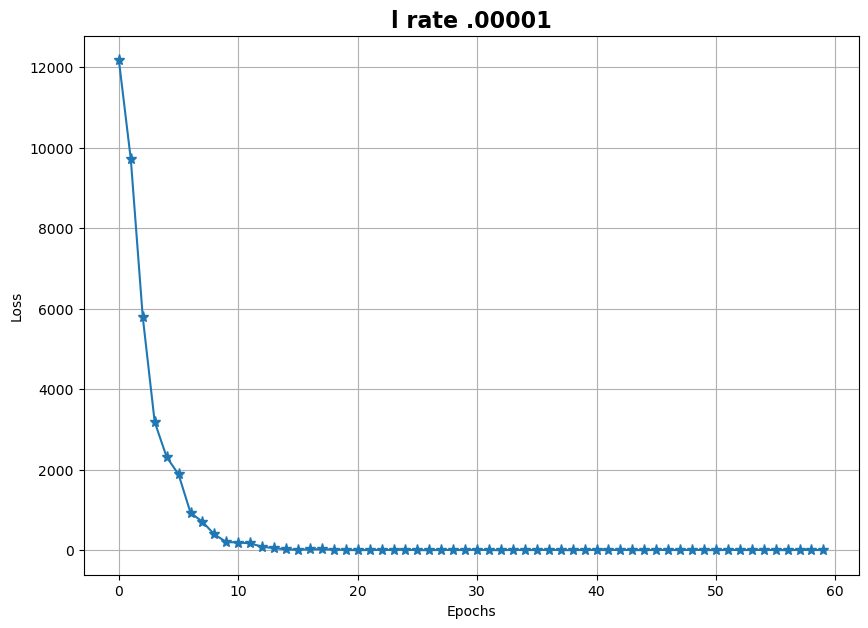

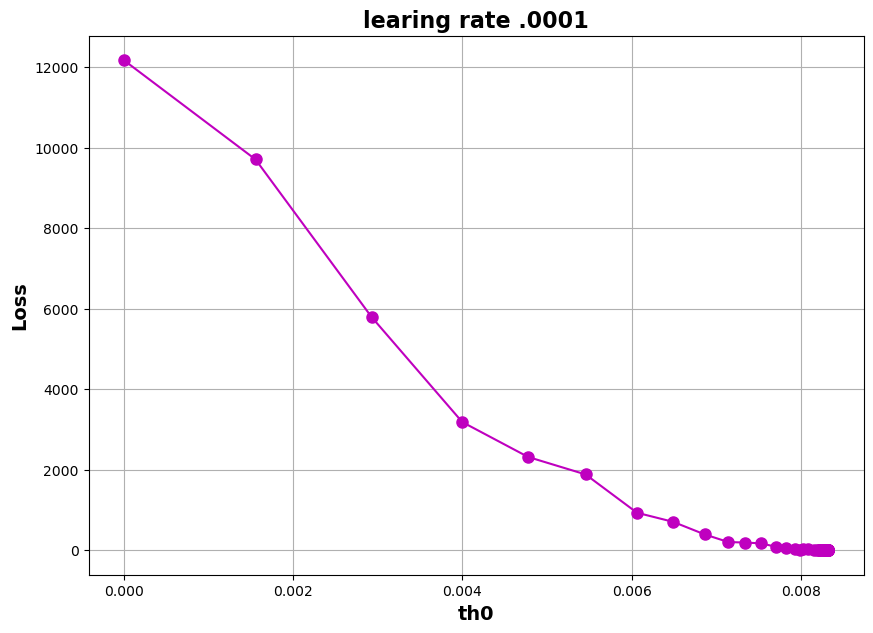

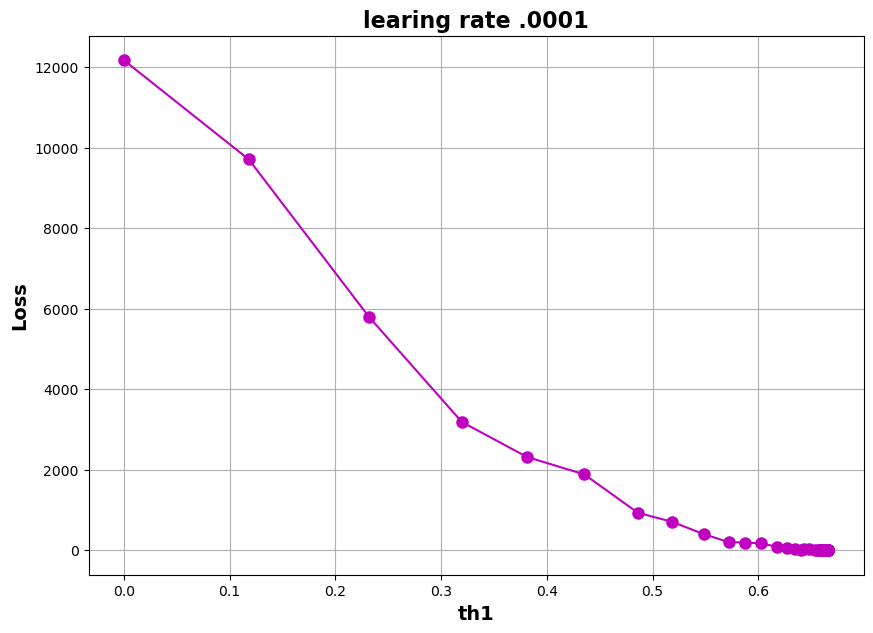

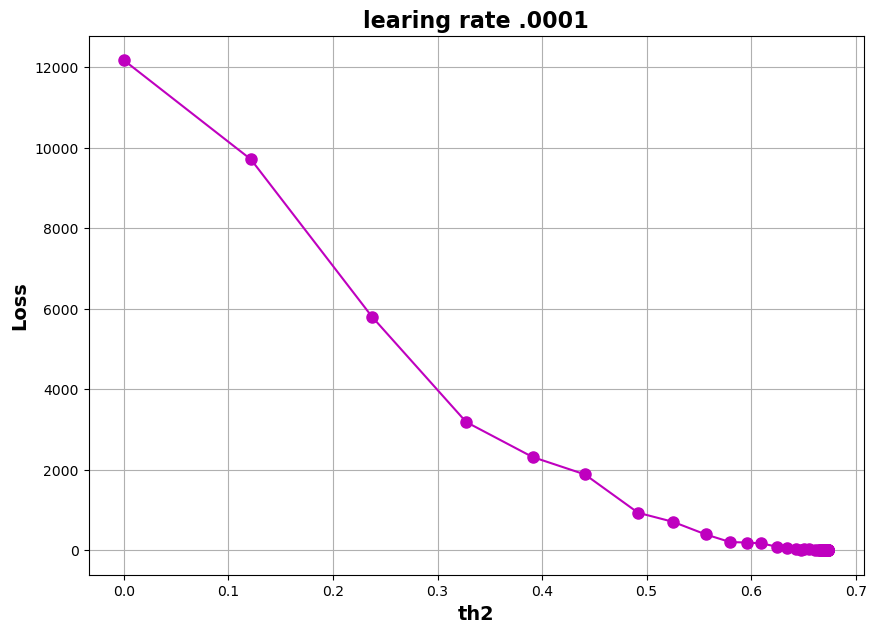

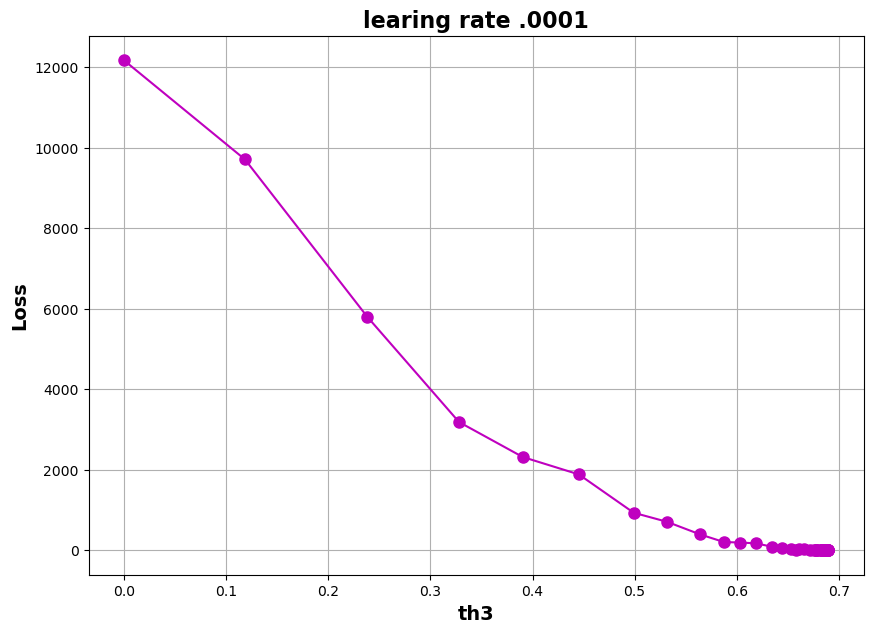

In [36]:
plot_loss(loss,"l rate .00001")
arr=np.array(ths_arr)
arr.reshape(-1,4)
plot_theta_loss(arr[:,0],"th0",loss,"learing rate .0001")
plot_theta_loss(arr[:,1],"th1",loss,"learing rate .0001")
plot_theta_loss(arr[:,2],"th2",loss,"learing rate .0001")
plot_theta_loss(arr[:,3],"th3",loss,"learing rate .0001")

### Make your implementation as a function
##### Use gradient check = 0.1, convergence check = 0.01, batch size = 4, and max_epochs = 10000.

In [38]:


def mini_batch_GD(x,y,alpha,epochs,gradient_check,convergence_check ,batch_size):
    
    m=x.shape[0]
    ones=np.ones((m,1))
    x_new=np.concatenate( (ones,x),axis=1)
    
    n_1=x_new.shape[1]
    data_new=np.concatenate( (x_new,y),axis=1)
    np.random.seed(101)
    np.random.shuffle(data_new)
    x_sh=data_new[:,:n_1]
    y_sh=data_new[:,-1].reshape((-1,1))
    
    ths=np.zeros((n_1,1))
    loss=[]
    ths_arr=[]
    batch_num=m//batch_size
    for epoch   in  range(epochs):
        print(f"******************************epoch {epoch+1}******************************************\n")
        for i in range(batch_num):
            ths_arr.append(ths)
            st=i* batch_size
            ed=(i+1)*(batch_size)
            
            if(i+1!=batch_num):
                x_b=x_sh[st:ed,]
                y_b=y_sh[st:ed,]
            else : 
                x_b=x_sh[st:,]
                y_b=y_sh[st:,]
            h=x_b@ths                                          #  (4,4)* (4,1)=4*1
            e=h-y_b
            j=np.linalg.norm(e)**2/(2*len(h))
            loss.append(j)
            grad=x_b.T@e/len(h)                              #(4,4) @ (4,1)
            ths=ths-alpha*grad
            
        print(f"j={j}\n")
        print(f"grad =\n{grad}\n")
        grad_norm=np.linalg.norm(grad)
        print(f"grad  norm={grad_norm}\n")
        print(f"ths =\n{ths_arr[-1]}\n")
        if(grad_norm<gradient_check):
            break
        if(epoch>0 and np.absolute(loss[-(batch_num+1)]-loss[-1])<convergencec_heck):
            break
    y_best_fit=x_new@ths_arr[-1]
    return loss,ths_arr,y_best_fit


In [39]:
L,T,y_p=mini_batch_GD(x,y,alpha=.00001,batch_size=4,convergence_check=.01,epochs=10000,gradient_check=.1)

******************************epoch 1******************************************

j=1883.7525786866875

grad =
[[  -60.78220031]
 [-5058.34684832]
 [-5085.66878787]
 [-5368.91284939]]

grad  norm=8959.900642195886

ths =
[[0.00545451]
 [0.43544405]
 [0.4409459 ]
 [0.44537091]]

******************************epoch 2******************************************

j=171.23188556352972

grad =
[[  -18.14941981]
 [-1514.94074129]
 [-1526.34988025]
 [-1610.96445522]]

grad  norm=2687.0662969069713

ths =
[[0.00752539]
 [0.60258285]
 [0.60974239]
 [0.61874659]]

******************************epoch 3******************************************

j=24.726198614719138

grad =
[[  -6.58094332]
 [-553.4405051 ]
 [-560.53024829]
 [-591.24472689]]

grad  norm=984.9386721140321

ths =
[[0.00808697]
 [0.64776628]
 [0.65530752]
 [0.66617713]]

******************************epoch 4******************************************

j=8.396846516830298

grad =
[[  -3.4409736 ]
 [-292.47457941]
 [-298.39050085]
 [-314.47

In [40]:
r2_score(y,y_p)

0.9786614322106626

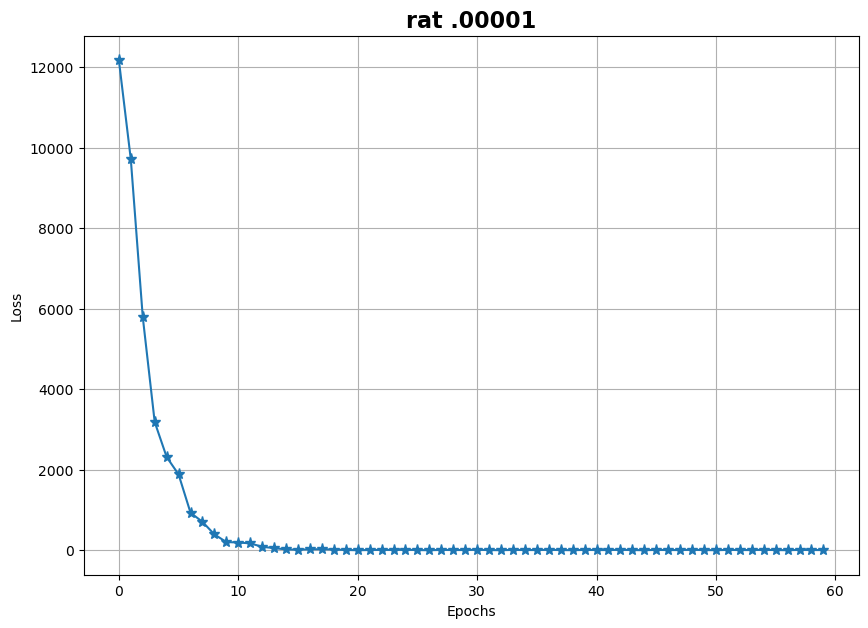

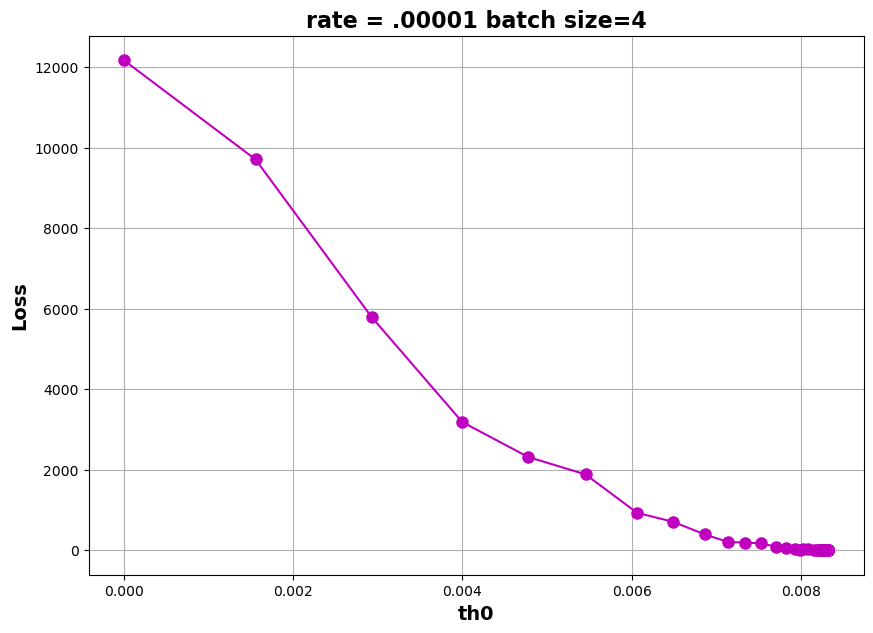

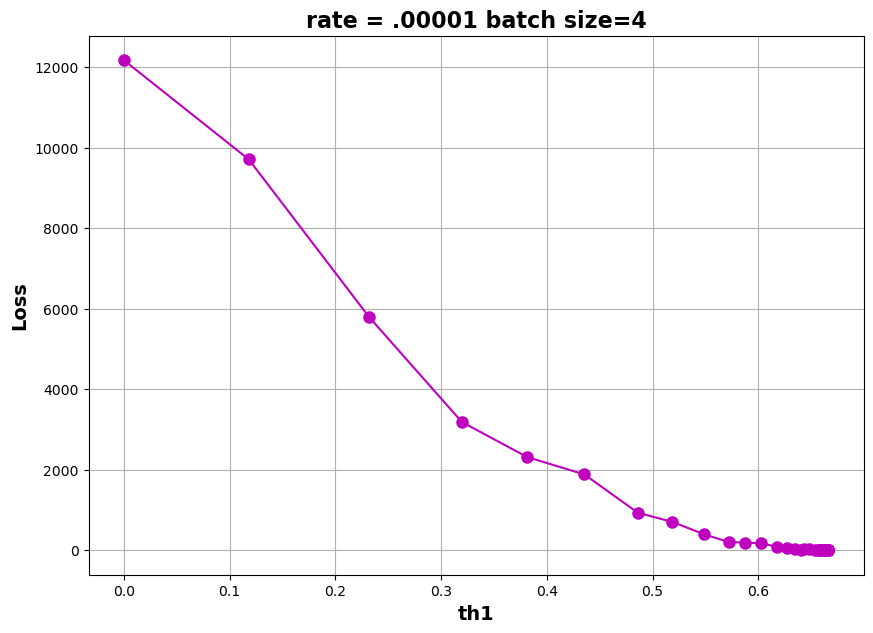

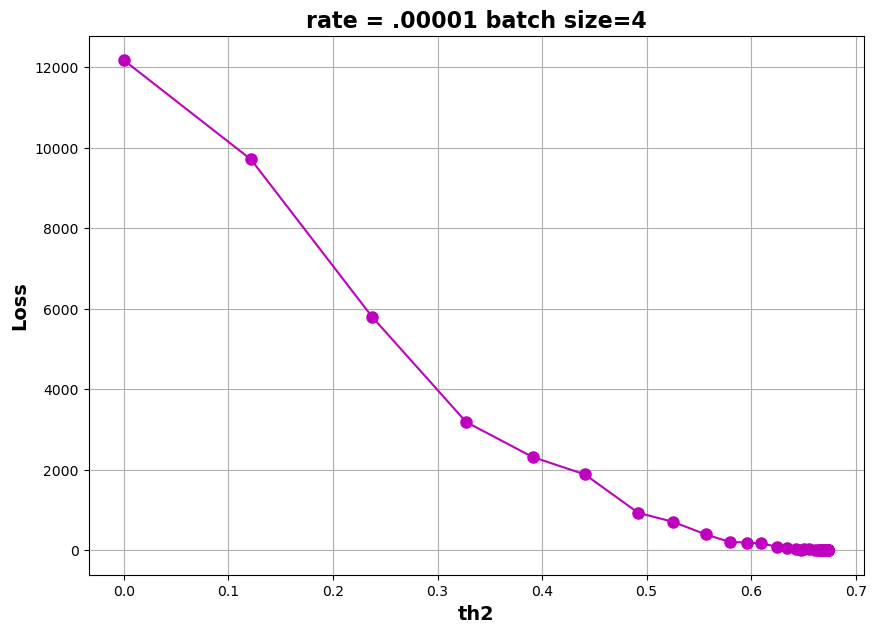

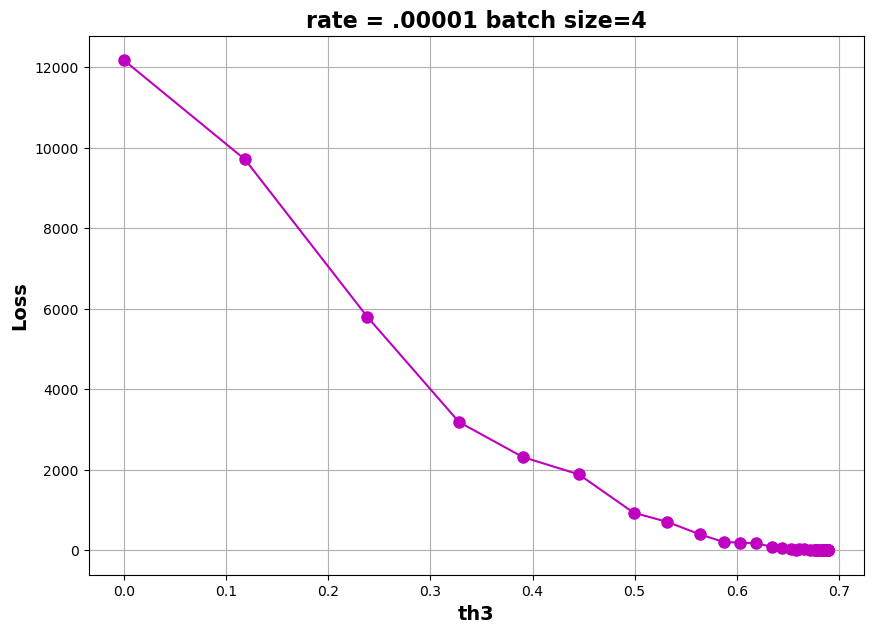

In [41]:
plot_loss(loss,"rat .00001")
arr=np.array(ths_arr)
arr.reshape(-1,4)
plot_theta_loss(arr[:,0],"th0",loss,"rate = .00001 batch size=4")
plot_theta_loss(arr[:,1],"th1",loss,"rate = .00001 batch size=4")
plot_theta_loss(arr[:,2],"th2",loss,"rate = .00001 batch size=4")
plot_theta_loss(arr[:,3],"th3",loss,"rate = .00001 batch size=4")

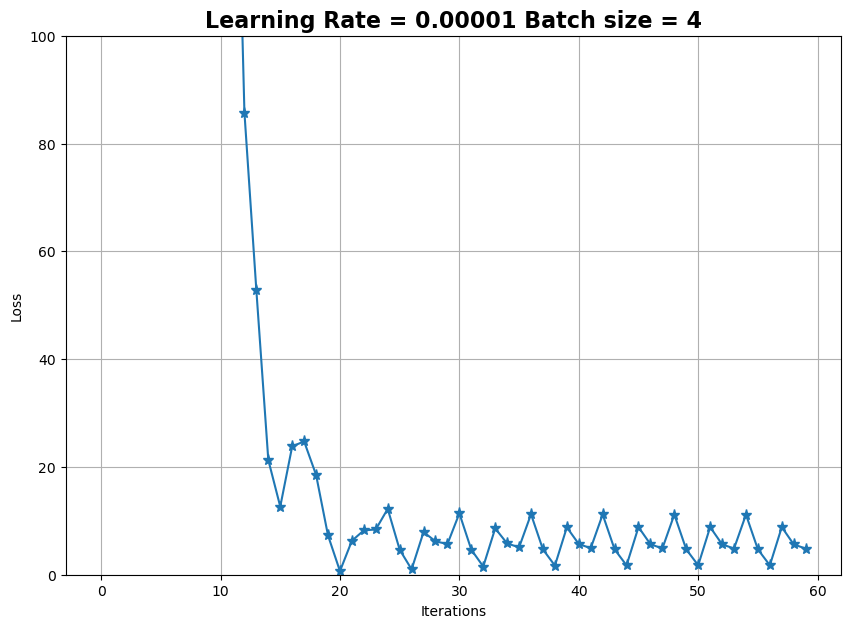

In [42]:
plt.figure(figsize=(10,7))
plt.grid()
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.plot(loss,'-*',markersize=8)
plt.title('Learning Rate = 0.00001 Batch size = 4',fontsize=16,fontweight='bold')
plt.ylim((0,100))
plt.show()

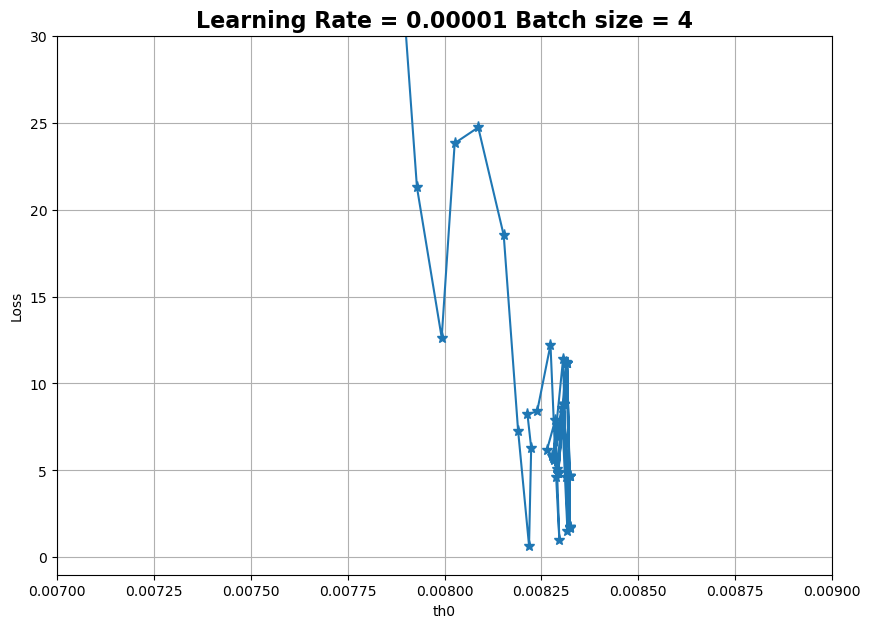

In [43]:
arr=np.array(ths_arr)
plt.figure(figsize=(10,7))
plt.grid()
plt.xlabel('th0')
plt.ylabel('Loss')
plt.plot(arr[:,0],loss,'-*',markersize=8)
plt.title('Learning Rate = 0.00001 Batch size = 4',fontsize=16,fontweight='bold')
plt.ylim((-1,30))
plt.xlim((.007,.009))

plt.show()

### Try mini-batch size = 1 and mini-batch size = m (25) and observe the results very carefully.

### Mini-batch size = 1

In [46]:
L,T,y_p=mini_batch_GD(x,y,alpha=.00001,batch_size=1,convergence_check=.01,epochs=10000,gradient_check=.1)

******************************epoch 1******************************************

j=0.24204037135034231

grad =
[[ 0.69575911]
 [48.70313788]
 [45.22434232]
 [51.48617433]]

grad  norm=84.07465138146812

ths =
[[0.00858371]
 [0.66962122]
 [0.6807672 ]
 [0.68329489]]

******************************epoch 2******************************************

j=0.9472218676718938

grad =
[[  1.37638793]
 [ 96.34715514]
 [ 89.46521549]
 [101.85270686]]

grad  norm=166.32097709997373

ths =
[[0.00862376]
 [0.67185715]
 [0.68264611]
 [0.68872658]]

******************************epoch 3******************************************

j=0.961873755509241

grad =
[[  1.38699225]
 [ 97.08945774]
 [ 90.15449647]
 [102.63742675]]

grad  norm=167.60239006616783

ths =
[[0.00862234]
 [0.67091965]
 [0.68134392]
 [0.69090053]]

******************************epoch 4******************************************

j=0.9727691998644739

grad =
[[  1.39482558]
 [ 97.63779063]
 [ 90.66366273]
 [103.21709295]]

grad  norm=168.5

In [47]:
r2_score(y,y_p)

0.9789233548252715

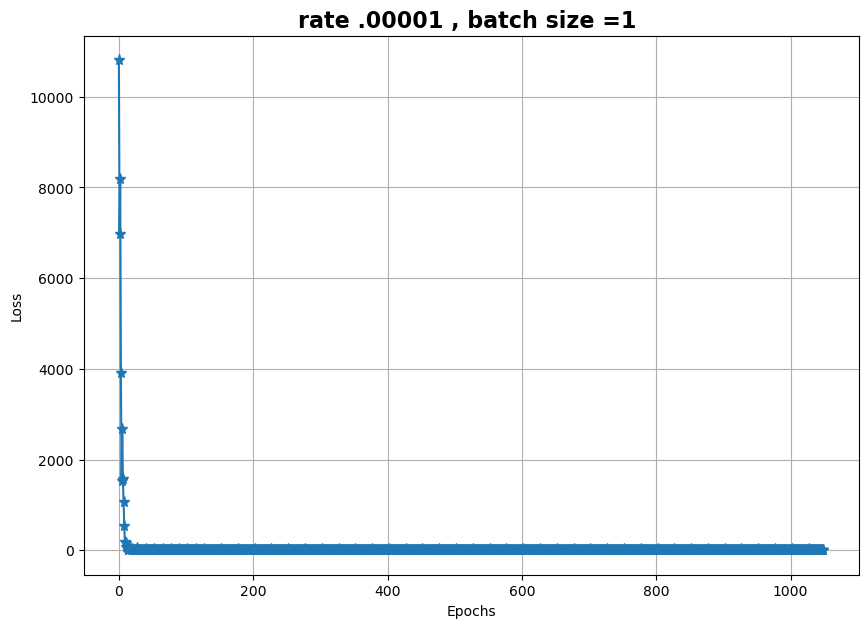

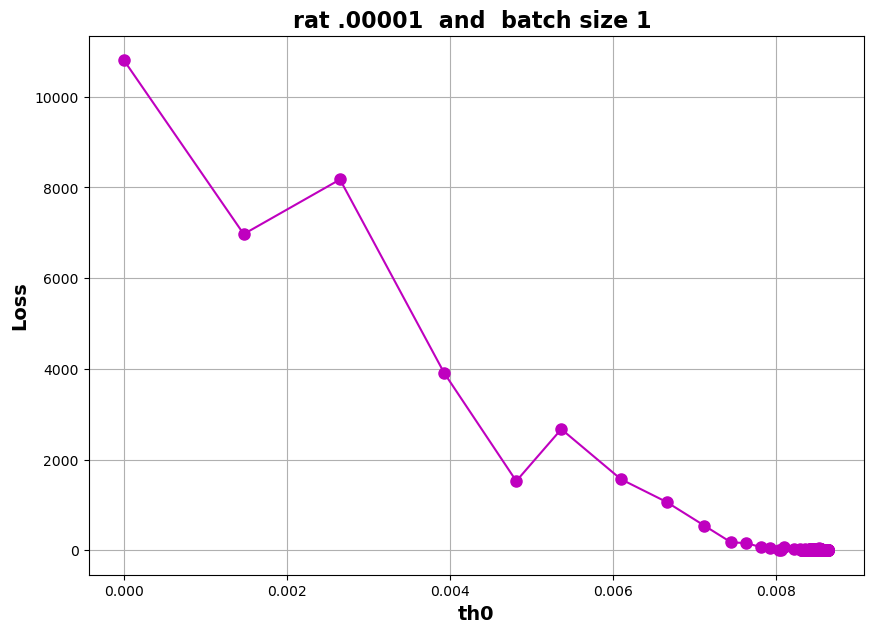

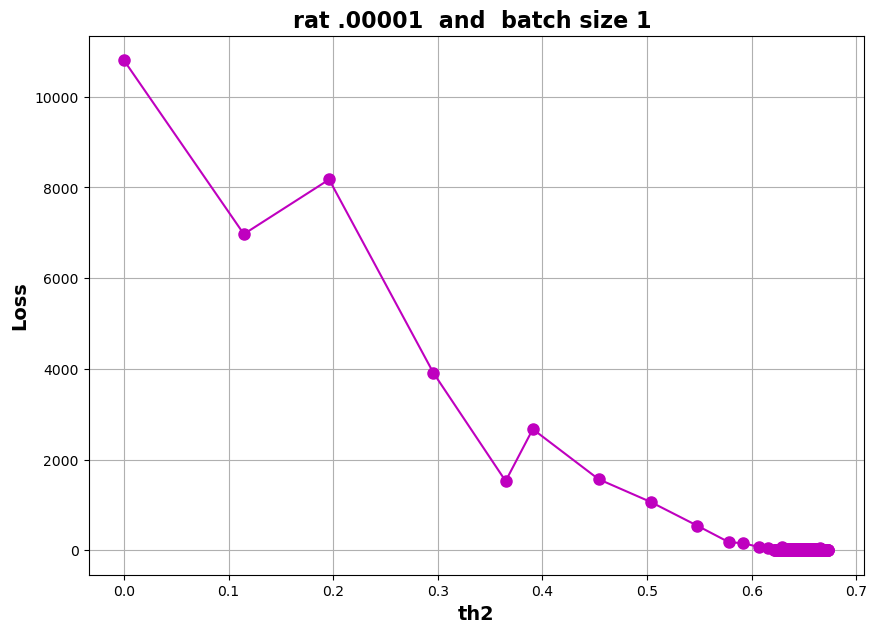

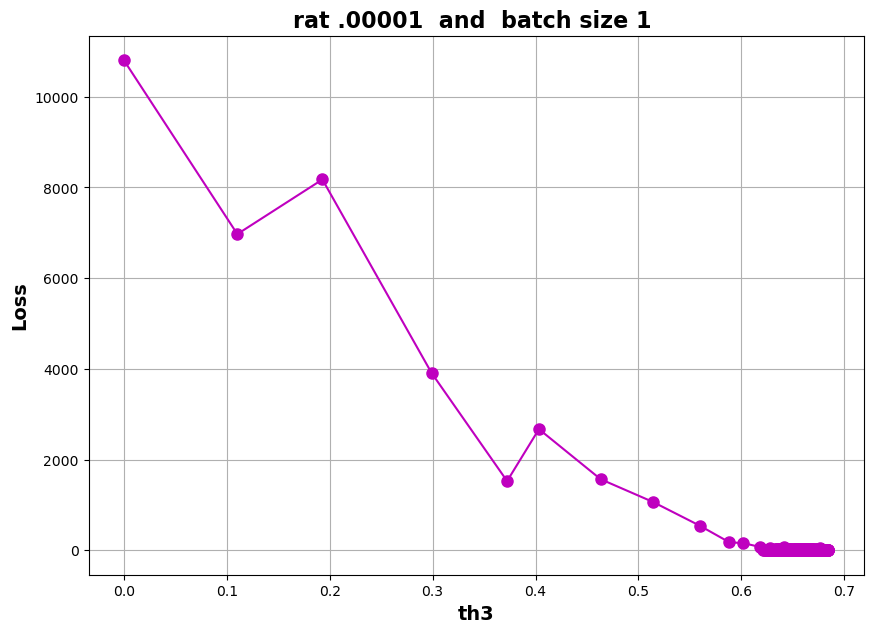

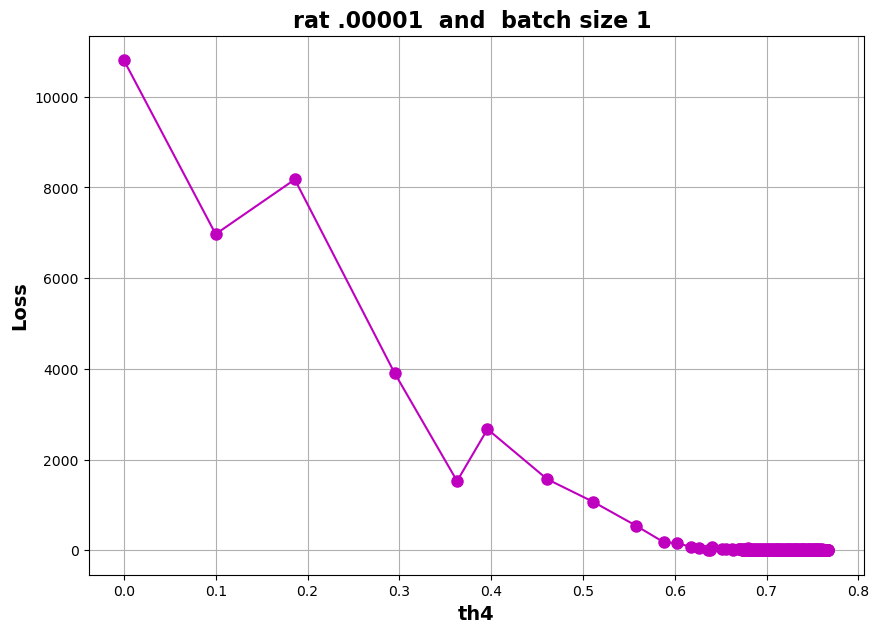

In [48]:
plot_loss(L,"rate .00001 , batch size =1 ")
arr=np.array(T)
arr.reshape((-1,4))
plot_theta_loss(arr[:,0],"th0",L,"rat .00001  and  batch size 1 ")
plot_theta_loss(arr[:,1],"th2",L,"rat .00001  and  batch size 1 ")
plot_theta_loss(arr[:,2],"th3",L,"rat .00001  and  batch size 1 ")
plot_theta_loss(arr[:,3],"th4",L,"rat .00001  and  batch size 1 ")

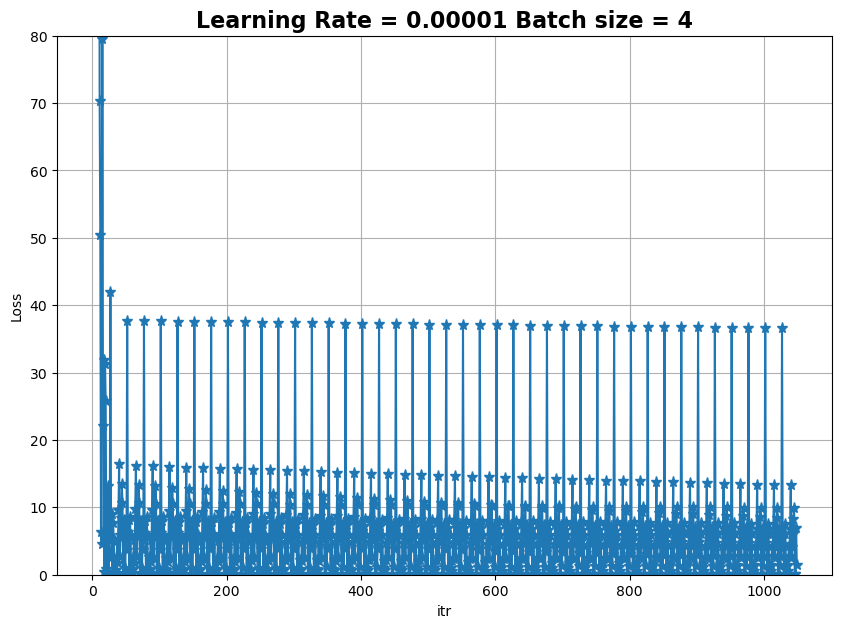

In [49]:
arr=np.array(ths_arr)
plt.figure(figsize=(10,7))
plt.grid()
plt.xlabel('itr')
plt.ylabel('Loss')
plt.plot(L,'-*',markersize=8)
plt.title('Learning Rate = 0.00001 Batch size = 4',fontsize=16,fontweight='bold')
plt.ylim((0,80))

plt.show()

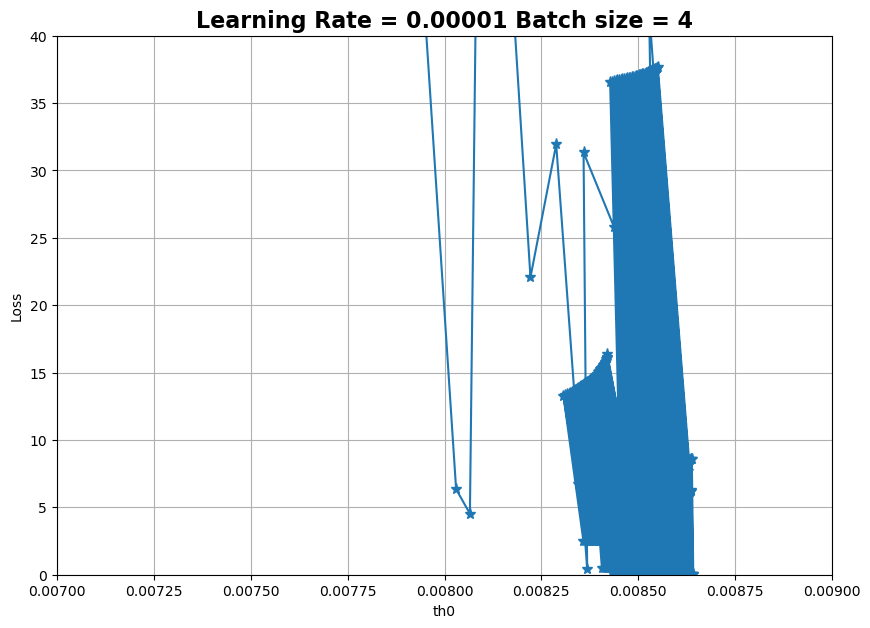

In [50]:
arr=np.array(T)
arr.reshape((-1,4))
plt.figure(figsize=(10,7))
plt.grid()
plt.xlabel('th0')
plt.ylabel('Loss')
plt.plot(arr[:,0],L,'-*',markersize=8)
plt.title('Learning Rate = 0.00001 Batch size = 4',fontsize=16,fontweight='bold')
plt.ylim((0,40))
plt.xlim((.007,.009))

plt.show()

### Mini-batch size = m (25)

In [52]:
L,T,y_p=mini_batch_GD(x,y,alpha=.00001,batch_size=25,convergence_check=.01,epochs=10000,gradient_check=.1)

******************************epoch 1******************************************

j=13405.98

grad =
[[  -162.04]
 [-13075.8 ]
 [-13147.2 ]
 [-13467.08]]

grad  norm=22917.545989219703

ths =
[[0.]
 [0.]
 [0.]
 [0.]]

******************************epoch 2******************************************

j=8668.481648916413

grad =
[[  -130.28089594]
 [-10512.48957462]
 [-10569.78406976]
 [-10829.54649638]]

grad  norm=18426.30789841306

ths =
[[0.0016204]
 [0.130758 ]
 [0.131472 ]
 [0.1346708]]

******************************epoch 3******************************************

j=5605.887123892012

grad =
[[ -104.7457425 ]
 [-8451.52100482]
 [-8497.47443694]
 [-8708.90018436]]

grad  norm=14815.235171712455

ths =
[[0.00292321]
 [0.2358829 ]
 [0.23716984]
 [0.24296626]]

******************************epoch 4******************************************

j=3626.04772762138

grad =
[[  -84.21480829]
 [-6794.4484357 ]
 [-6831.28348838]
 [-7003.844704  ]]

grad  norm=11911.838498552843

ths =
[[0.00397

In [53]:
r2_score(y,y_p)

0.9788982282256367

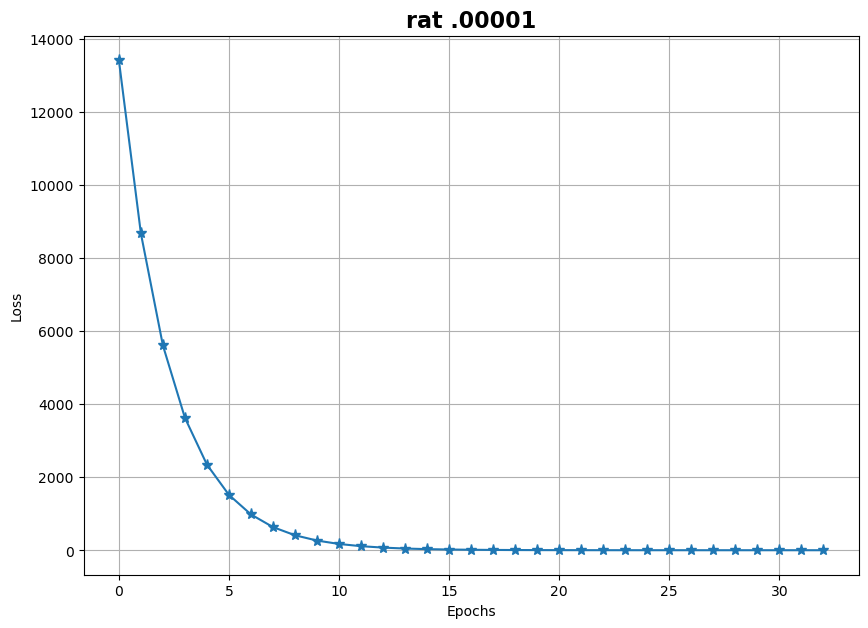

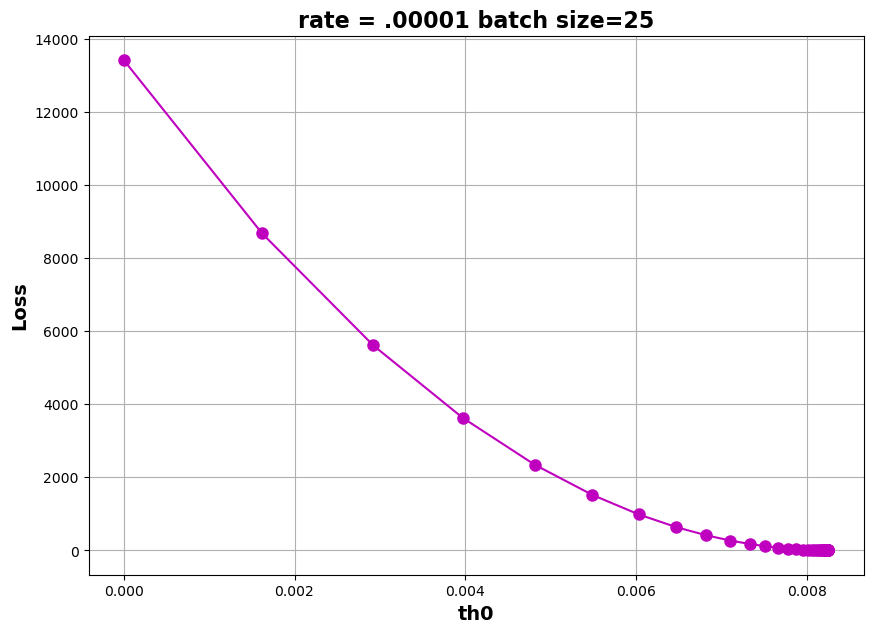

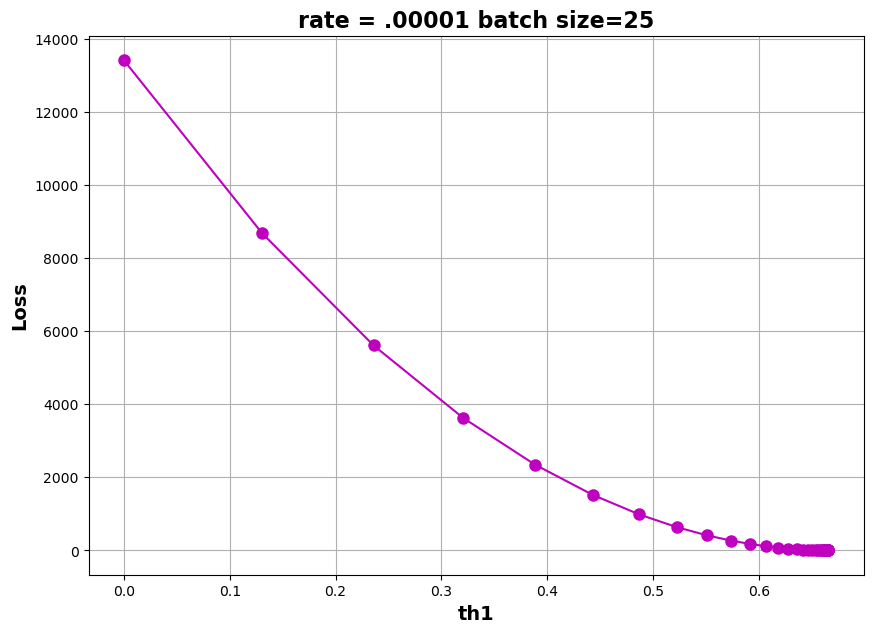

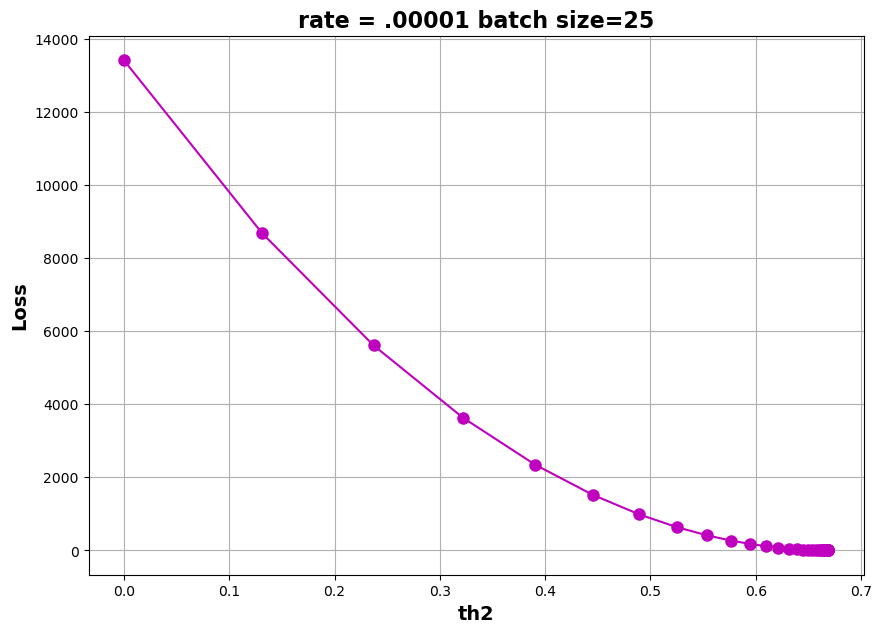

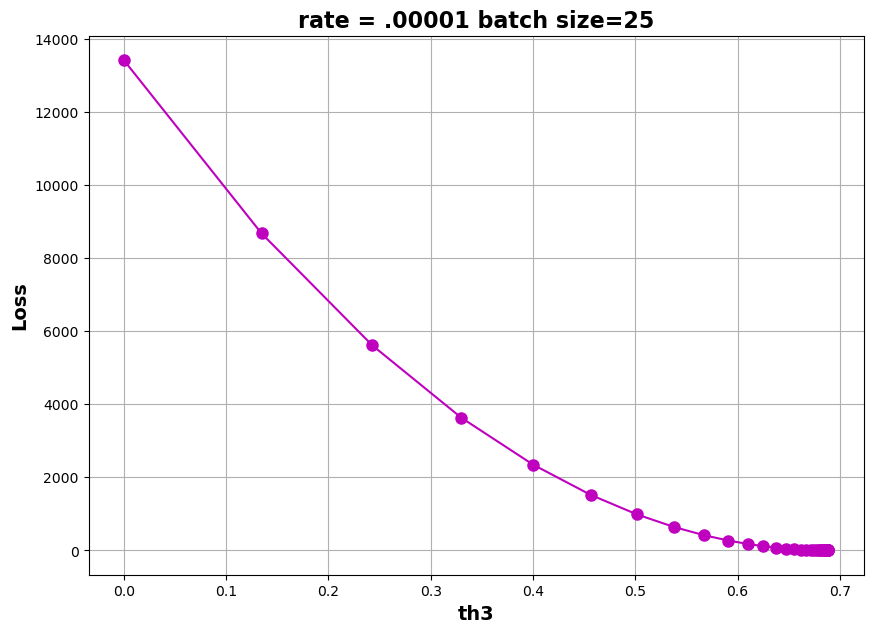

In [105]:
plot_loss(L,"rat .00001")
arr=np.array(T)
arr.reshape(-1,4)
plot_theta_loss(arr[:,0],"th0",L,"rate = .00001 batch size=25")
plot_theta_loss(arr[:,1],"th1",L,"rate = .00001 batch size=25")
plot_theta_loss(arr[:,2],"th2",L,"rate = .00001 batch size=25")
plot_theta_loss(arr[:,3],"th3",L,"rate = .00001 batch size=25")



r squared: 0.9788982282256367


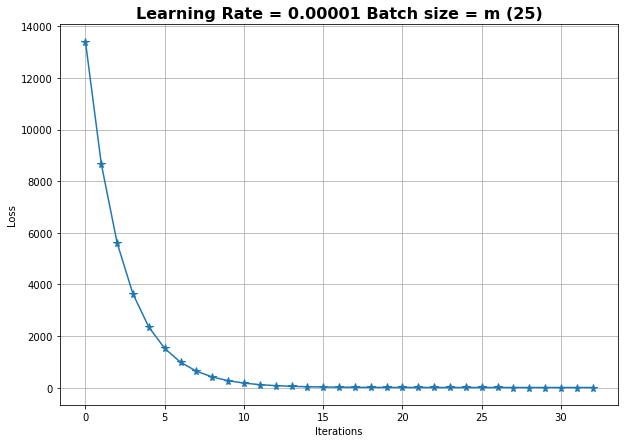

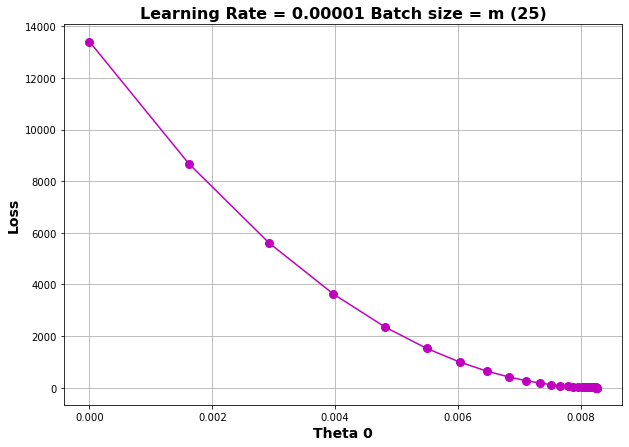

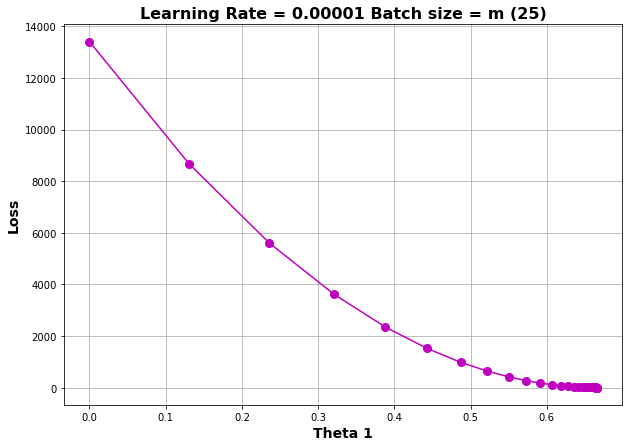

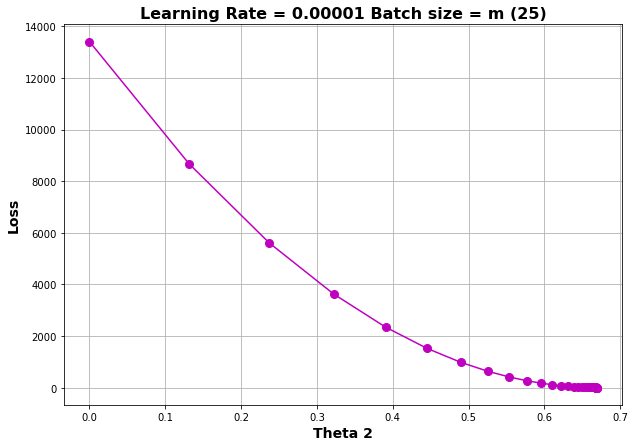

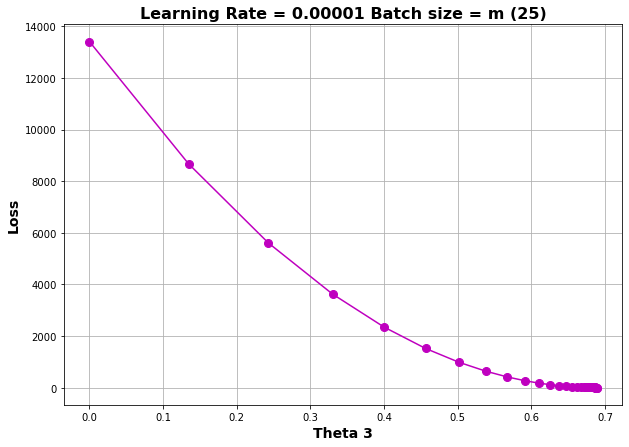

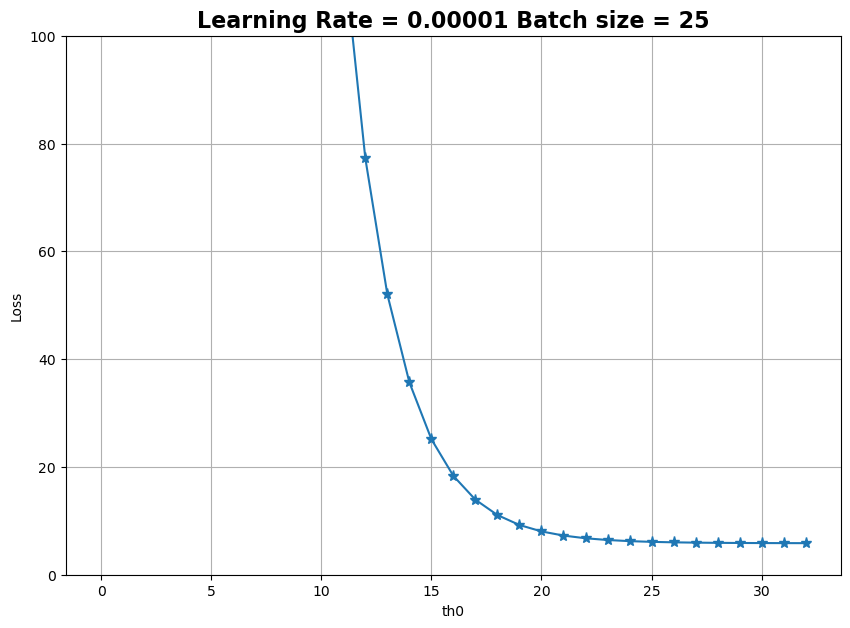

In [109]:
arr=np.array(T)
arr.reshape((-1,4))
plt.figure(figsize=(10,7))
plt.grid()
plt.xlabel('th0')
plt.ylabel('Loss')
plt.plot(L,'-*',markersize=8)
plt.title('Learning Rate = 0.00001 Batch size = 25',fontsize=16,fontweight='bold')
plt.ylim((0,100))


plt.show()

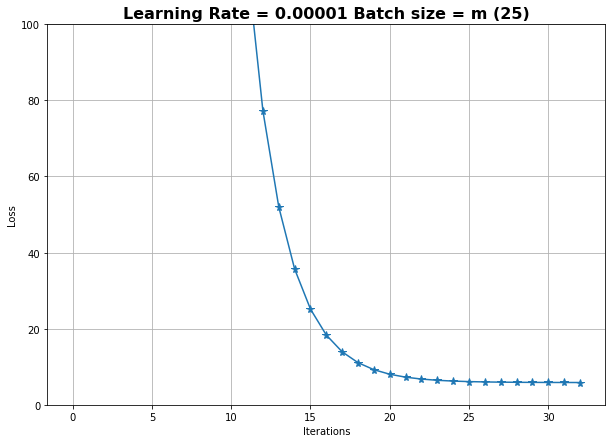

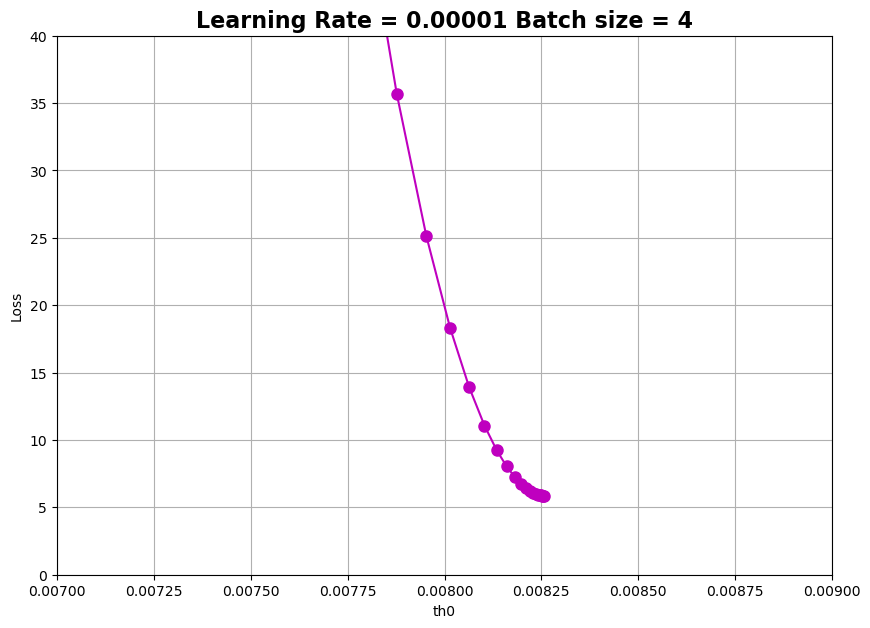

In [115]:
arr=np.array(T)
arr.reshape((-1,4))
plt.figure(figsize=(10,7))
plt.grid()
plt.xlabel('th0')
plt.ylabel('Loss')
plt.plot(arr[:,0],L,'mo-',markersize=8)
plt.title('Learning Rate = 0.00001 Batch size = 4',fontsize=16,fontweight='bold')
plt.ylim((0,40))
plt.xlim((.007,.009))

plt.show()

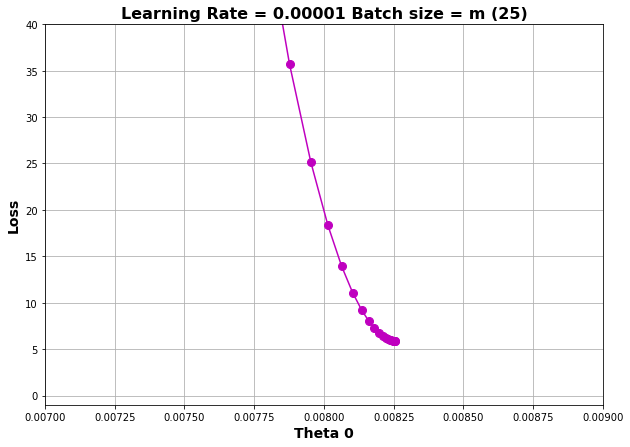

## Single Variable Linear Regression:

### Data Generation
- To have a dataset or set of data points, the trainee must generate a pair of arrays <b>X</b> and <b>y</b>.
- The values in <b>X</b> are <b>50 data points</b> equally distributed between <b>0</b> and <b>20</b>.
- You should use <b>np.linspace(0,20)</b> to generate X data points. 
- The values in <b>y</b> will be generated by the equation:
$\mathbf{y_i = a*x_i + b ; a = -2, b = 1}$.
- Reshape both X and y to be column vectors.

## Single Variable 

In [150]:
x=np.linspace(0,20).reshape(-1,1)
a=-2
b=1
y=a*x+b

print(x)

print(y)

[[ 0.        ]
 [ 0.40816327]
 [ 0.81632653]
 [ 1.2244898 ]
 [ 1.63265306]
 [ 2.04081633]
 [ 2.44897959]
 [ 2.85714286]
 [ 3.26530612]
 [ 3.67346939]
 [ 4.08163265]
 [ 4.48979592]
 [ 4.89795918]
 [ 5.30612245]
 [ 5.71428571]
 [ 6.12244898]
 [ 6.53061224]
 [ 6.93877551]
 [ 7.34693878]
 [ 7.75510204]
 [ 8.16326531]
 [ 8.57142857]
 [ 8.97959184]
 [ 9.3877551 ]
 [ 9.79591837]
 [10.20408163]
 [10.6122449 ]
 [11.02040816]
 [11.42857143]
 [11.83673469]
 [12.24489796]
 [12.65306122]
 [13.06122449]
 [13.46938776]
 [13.87755102]
 [14.28571429]
 [14.69387755]
 [15.10204082]
 [15.51020408]
 [15.91836735]
 [16.32653061]
 [16.73469388]
 [17.14285714]
 [17.55102041]
 [17.95918367]
 [18.36734694]
 [18.7755102 ]
 [19.18367347]
 [19.59183673]
 [20.        ]]
[[  1.        ]
 [  0.18367347]
 [ -0.63265306]
 [ -1.44897959]
 [ -2.26530612]
 [ -3.08163265]
 [ -3.89795918]
 [ -4.71428571]
 [ -5.53061224]
 [ -6.34693878]
 [ -7.16326531]
 [ -7.97959184]
 [ -8.79591837]
 [ -9.6122449 ]
 [-10.42857143]
 [-11.244

X:
 [[ 0.        ]
 [ 0.40816327]
 [ 0.81632653]
 [ 1.2244898 ]
 [ 1.63265306]
 [ 2.04081633]
 [ 2.44897959]
 [ 2.85714286]
 [ 3.26530612]
 [ 3.67346939]
 [ 4.08163265]
 [ 4.48979592]
 [ 4.89795918]
 [ 5.30612245]
 [ 5.71428571]
 [ 6.12244898]
 [ 6.53061224]
 [ 6.93877551]
 [ 7.34693878]
 [ 7.75510204]
 [ 8.16326531]
 [ 8.57142857]
 [ 8.97959184]
 [ 9.3877551 ]
 [ 9.79591837]
 [10.20408163]
 [10.6122449 ]
 [11.02040816]
 [11.42857143]
 [11.83673469]
 [12.24489796]
 [12.65306122]
 [13.06122449]
 [13.46938776]
 [13.87755102]
 [14.28571429]
 [14.69387755]
 [15.10204082]
 [15.51020408]
 [15.91836735]
 [16.32653061]
 [16.73469388]
 [17.14285714]
 [17.55102041]
 [17.95918367]
 [18.36734694]
 [18.7755102 ]
 [19.18367347]
 [19.59183673]
 [20.        ]]
y:
 [[  1.        ]
 [  0.18367347]
 [ -0.63265306]
 [ -1.44897959]
 [ -2.26530612]
 [ -3.08163265]
 [ -3.89795918]
 [ -4.71428571]
 [ -5.53061224]
 [ -6.34693878]
 [ -7.16326531]
 [ -7.97959184]
 [ -8.79591837]
 [ -9.6122449 ]
 [-10.42857143]
 

### Plot the data (scatter plot of X,y)

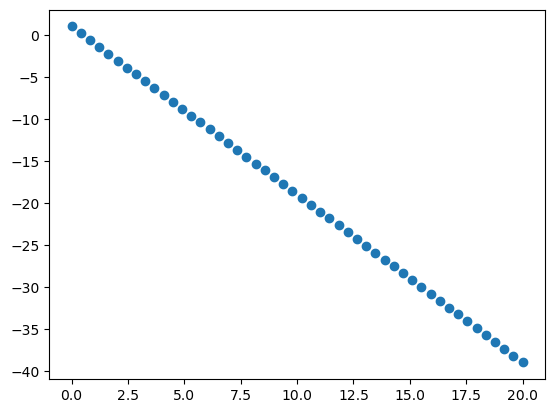

In [141]:
plt.figure()

plt.scatter(x,y)


plt.show()

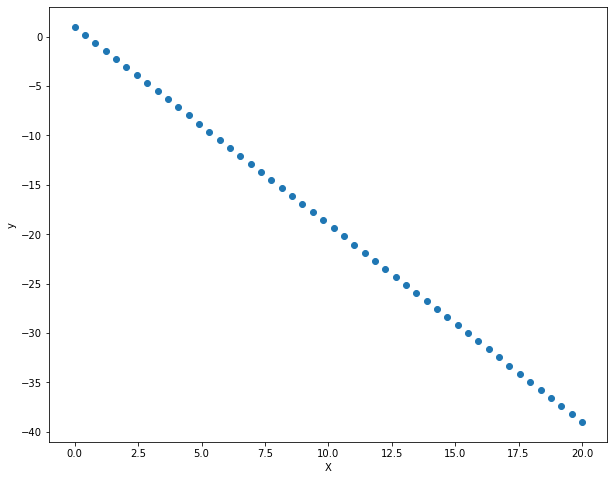

### Use the Mini-Batch GD Multivariable LR function for this data

##### The following results uses the hyper-parameters alpha = 0.001, max. epochs = 500, 0.001 for both stop conditions, and batch size = 8.

In [154]:
L,T,y_p=mini_batch_GD(x,y,alpha=.001,batch_size=8,convergence_check=.001,epochs=500,gradient_check=.001)


******************************epoch 1******************************************

j=38.97476527231926

grad =
[[ 6.84332775]
 [88.82808627]]

grad  norm=89.0913017370593

ths =
[[-0.07408208]
 [-1.03972009]]

******************************epoch 2******************************************

j=6.578969204430637

grad =
[[ 2.55039507]
 [36.01193949]]

grad  norm=36.102137069597916

ths =
[[-0.11058282]
 [-1.5559705 ]]

******************************epoch 3******************************************

j=1.2187432453027043

grad =
[[ 0.78820233]
 [14.32745168]]

grad  norm=14.349116156964381

ths =
[[-0.12455194]
 [-1.76800753]]

******************************epoch 4******************************************

j=0.3561825925516322

grad =
[[0.06507692]
 [5.42495902]]

grad  norm=5.425349334106802

ths =
[[-0.12927161]
 [-1.8551409 ]]

******************************epoch 5******************************************

j=0.22727945329576044

grad =
[[-0.23143018]
 [ 1.77048033]]

grad  norm=1.7855420

****************** Epoch 0 ********************

j = 38.97476527231926

Gradient Vector:
[[ 6.84332775]
 [88.82808627]]

Gradient Vector Norm:
89.0913017370593

New Thetas : [[-0.07408208]
 [-1.03972009]]

****************** Epoch 1 ********************

j = 6.578969204430637

Gradient Vector:
[[ 2.55039507]
 [36.01193949]]

Gradient Vector Norm:
36.102137069597916

New Thetas : [[-0.11058282]
 [-1.5559705 ]]

****************** Epoch 2 ********************

j = 1.2187432453027043

Gradient Vector:
[[ 0.78820233]
 [14.32745168]]

Gradient Vector Norm:
14.349116156964381

New Thetas : [[-0.12455194]
 [-1.76800753]]

****************** Epoch 3 ********************

j = 0.3561825925516322

Gradient Vector:
[[0.06507692]
 [5.42495902]]

Gradient Vector Norm:
5.425349334106802

New Thetas : [[-0.12927161]
 [-1.8551409 ]]

****************** Epoch 4 ********************

j = 0.22727945329576044

Gradient Vector:
[[-0.23143018]
 [ 1.77048033]]

Gradient Vector Norm:
1.7855420791073728

New Th

In [156]:
r2_score(y,y_p)

0.9976192372592104

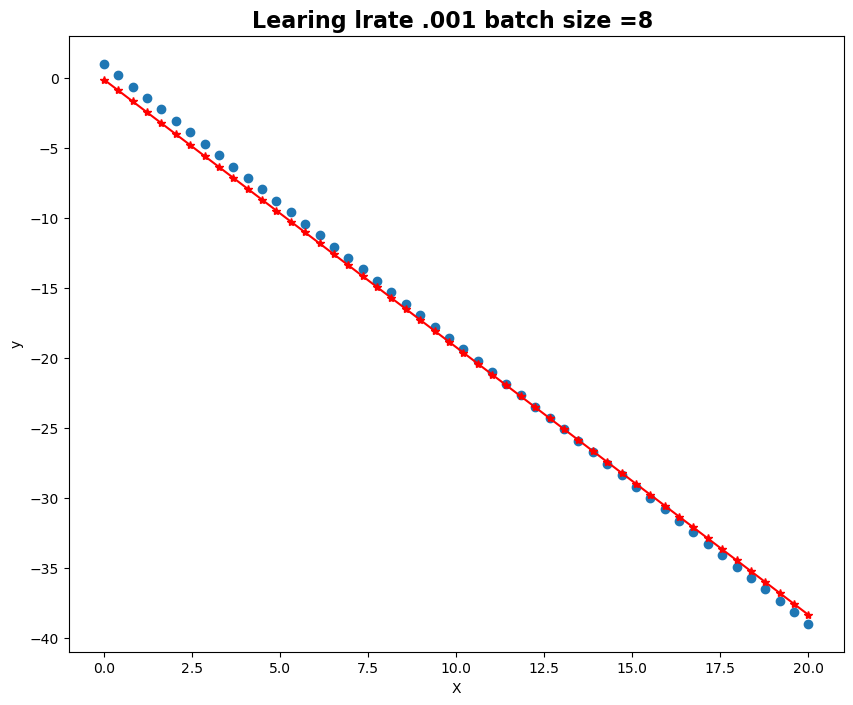

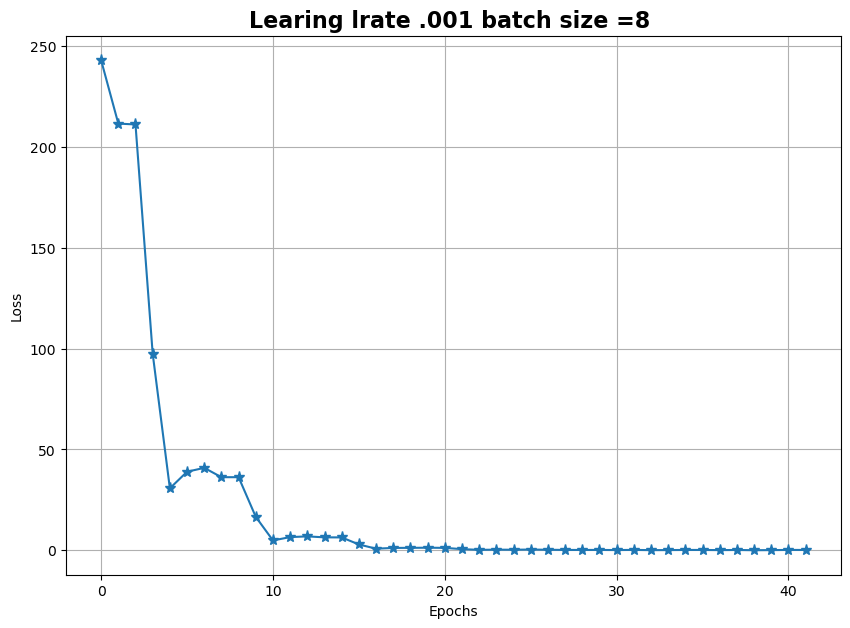

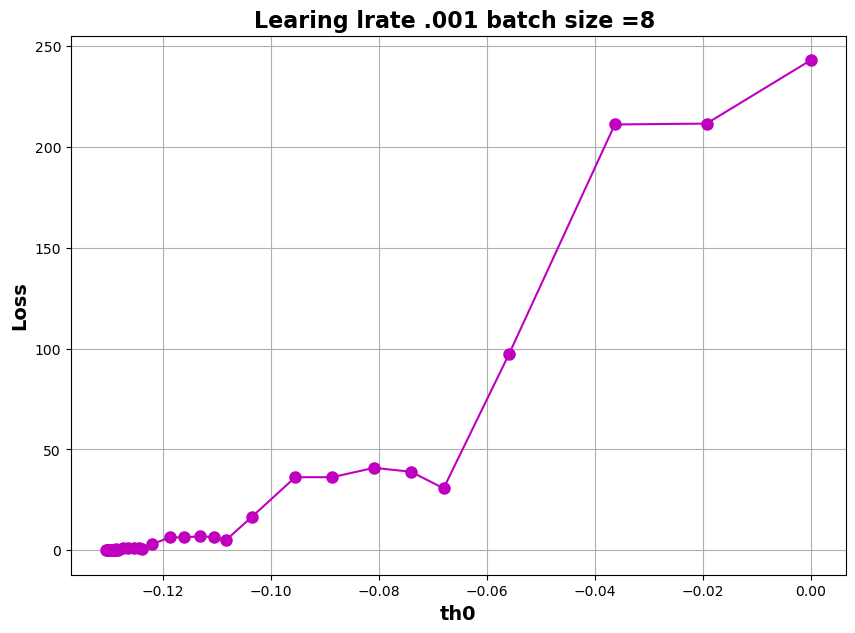

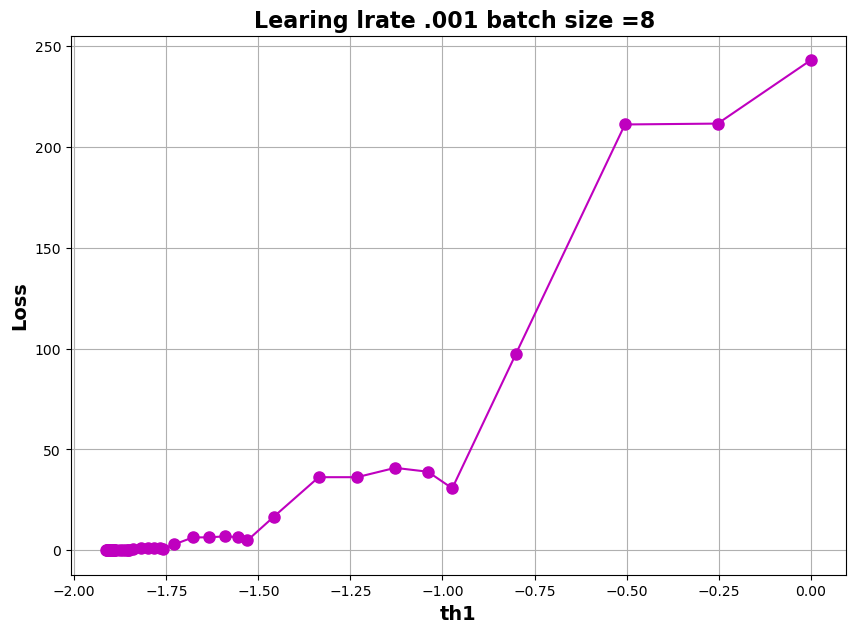

In [176]:
plotReg(x,y,y_p,"Learing lrate .001 batch size =8 ")
plot_loss(L,"Learing lrate .001 batch size =8 ")
arr=np.array(T)
arr=arr.reshape((-1,2))
plot_theta_loss(arr[:,0],"th0",L,"Learing lrate .001 batch size =8 ")
plot_theta_loss(arr[:,1],"th1",L,"Learing lrate .001 batch size =8 ")




r squared: 0.9976192372592104


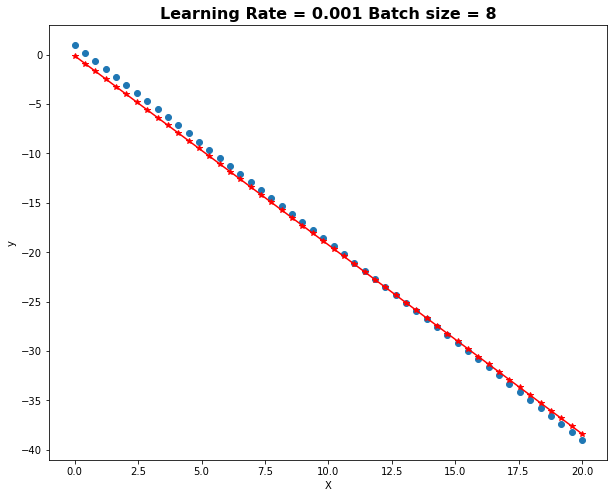

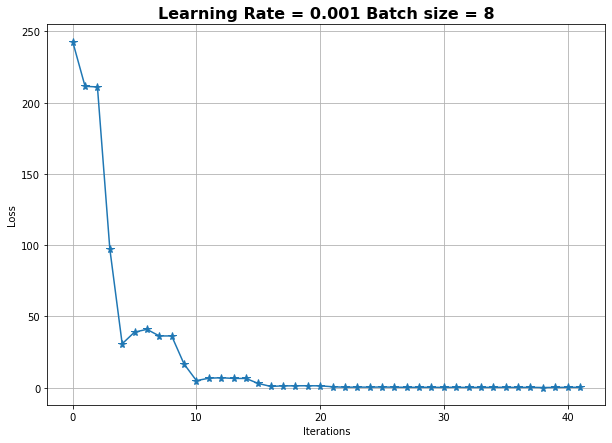

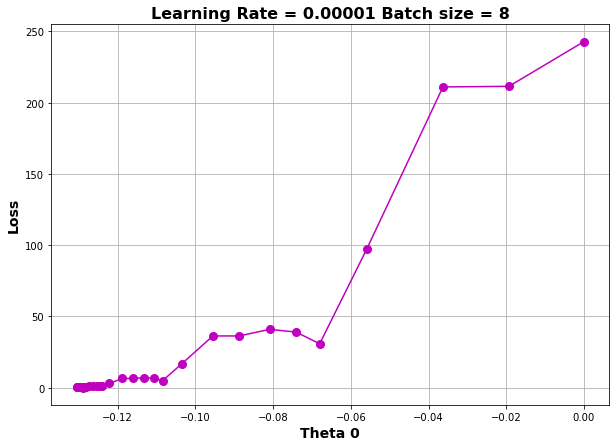

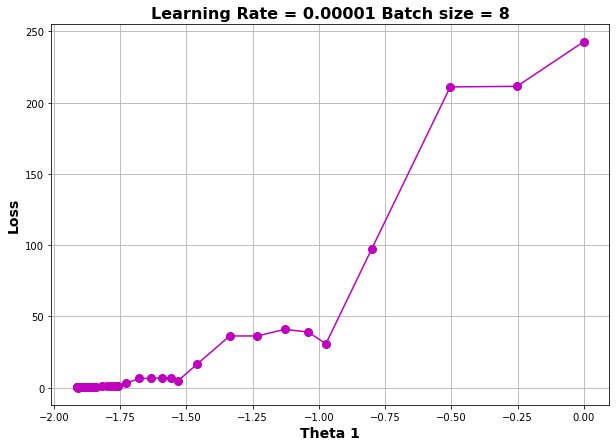